In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [267]:
class Pendulum:
    def __init__(self, position, velocity, dt):
        self.position = position
        self.velocity = velocity
        self.nextVelocity = velocity
        self.acceleration = -self.position
        self.dt = dt
        
    def move(self):
        self.velocity = self.nextVelocity
        self.position = self.updateVariable(self.position, self.velocity) # position of time=t which uses the information of velocity at time=t
        self.acceleration = -self.position
        self.nextVelocity = self.updateVariable(self.velocity, self.acceleration) # calculates the velocity at time=t+dt 
        
    def updateVariable(self, variable, ddtVariable):
        newValue = self.EulerSolver(variable, ddtVariable, self.dt)
        return newValue
        
    def EulerSolver(self, f0, derivitive, dh):
        return (f0 + derivitive*dh)
    
    def moveForTimeT(self, time):
        N = time/self.dt
        positionList = np.zeros(int(N))
        EnergyList = np.zeros(int(N))
        velocityList = np.zeros(int(N))
        timeList = np.zeros(int(N))
        t = 0
        
        
        for i in range(int(N)):
            self.move()
            t += dt
            timeList[i] = (t)
            positionList[i] = self.position  
            EnergyList[i] = self.calculateEnergy()
            velocityList[i] = self.velocity
            
            
        return positionList, EnergyList, velocityList, timeList
    
    def calculateEnergy(self):
        return (0.5*self.velocity**2 )
        
        

In [344]:
class Env:
    def __init__(self, lengthD, timeD, massD):
        self.lenghtD = lengthD
        self.timeD = timeD
        self.massD = massD
        
        
    def Sim2SI(self, value, quantity):
        if quantity == "mass":
            return value*self.massD
        if quantity == "length":
            return value*self.lengthD
        if quantity == "time":
            return value*self.timeD
        
    def SI2Sim(self, value, quantity):
        return value / self.Sim2SI(1, quantity)
    

In [352]:
myEnv = Env(0.1,10,1)

In [353]:
#myEnv.Sim2SI(1, 'time')
myEnv.SI2Sim(1, 'time')

0.1

In [325]:
position = 0.01
velocity = 0
dt = 0.05
tmax = 100

In [326]:
pendulum = Pendulum(position, velocity, dt)

In [327]:
positionList, energyList, velocityList, timeList = pendulum.moveForTimeT(tmax)

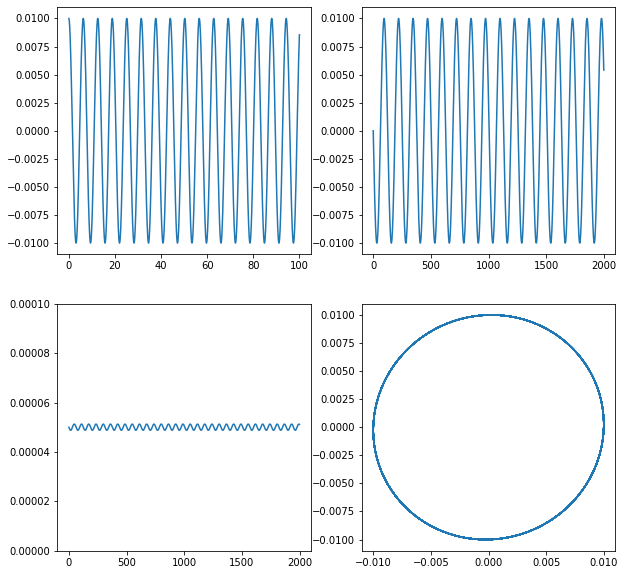

In [328]:
fig = plt.figure(figsize = (10,10))
fig.add_subplot(2,2,1)
plt.plot(timeList,positionList)
fig.add_subplot(2,2,2)
plt.plot(velocityList)
fig.add_subplot(2,2,3)
plt.plot(0.5*velocityList**2 + 1 - np.cos(positionList))
plt.ylim([0,0.0001])
fig.add_subplot(2,2,4)
plt.plot(positionList, velocityList)